Credits:
https://towardsdatascience.com/neural-prophet-a-time-series-modeling-library-based-on-neural-networks-dd02dc8d868d
https://www.youtube.com/watch?v=mgX0Iz4q0bE&ab_channel=NicholasRenotte

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and analyze data

In [2]:
df = pd.read_csv('austin_weather.csv')

In [3]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                         object
DewPointAvgF                          object
DewPointLowF                          object
HumidityHighPercent                   object
HumidityAvgPercent                    object
HumidityLowPercent                    object
SeaLevelPressureHighInches            object
SeaLevelPressureAvgInches             object
SeaLevelPressureLowInches             object
VisibilityHighMiles                   object
VisibilityAvgMiles                    object
VisibilityLowMiles                    object
WindHighMPH                           object
WindAvgMPH                            object
WindGustMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

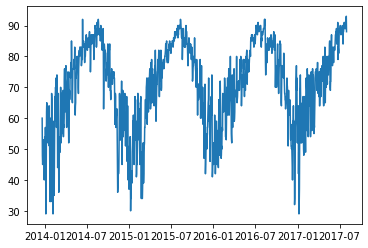

In [7]:
plt.plot(df['Date'], df['TempAvgF'])
plt.show()

In [8]:
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [9]:
df['TempAvgC'] = (df['TempAvgF'] -32) * (5/9)

In [10]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,TempAvgC
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm",15.555556
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,29.87,10,10,5,16,6,25,0,,8.888889
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.41,10,10,10,8,3,12,0,,7.222222
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.3,10,10,7,12,4,20,0,,7.777778
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.27,10,10,7,10,2,16,T,,10.000000


In [11]:
data = df[['Date', 'TempAvgC']]
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2013-12-21,15.555556
1,2013-12-22,8.888889
2,2013-12-23,7.222222
3,2013-12-24,7.777778
4,2013-12-25,10.000000


# 2. Train model

In [12]:
from neuralprophet import NeuralProphet

model = NeuralProphet()
model.fit(data, freq = 'D', epochs = 2000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.57E-02, min: 4.16E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.84E-01
Epoch[2000/2000]: 100%|███████| 2000/2000 [02:31<00:00, 13.17it/s, SmoothL1Loss=0.00612, MAE=2.75, MSE=13.6, RegLoss=0]


,SmoothL1Loss,MAE,MSE,RegLoss
0,1.115552,50.848489,4509.037703,0.0
1,0.970780,45.544094,3749.650674,0.0
2,0.835369,40.425219,3087.731403,0.0
3,0.707704,35.546433,2505.780033,0.0
4,0.588067,30.890641,1987.331327,0.0
...,...,...,...,...
1995,0.006122,2.751712,13.603482,0.0
1996,0.006121,2.751666,13.603278,0.0
1997,0.006121,2.751683,13.602927,0.0
1998,0.006121,2.751704,13.602750,0.0


# 3. Make predictions

In [13]:
future = model.make_future_dataframe(data, periods = 900, n_historic_predictions=len(data))
forecast = model.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2013-12-21,15.555556,9.522422,-6.033134,18.533037,-8.943960,-0.066654
1,2013-12-22,8.888889,9.403038,0.514149,18.544893,-9.005476,-0.136378
2,2013-12-23,7.222222,9.496564,2.274342,18.556749,-9.066628,0.006443
3,2013-12-24,7.777778,9.537881,1.760103,18.568605,-9.127081,0.096358
4,2013-12-25,10.000000,9.451308,-0.548692,18.580462,-9.186464,0.057313


In [14]:
future.head()

,ds,y,t,y_scaled
0,2013-12-21,15.555556,0.000000,0.516667
1,2013-12-22,8.888889,0.000759,0.316667
2,2013-12-23,7.222222,0.001517,0.266667
3,2013-12-24,7.777778,0.002276,0.283333
4,2013-12-25,10.000000,0.003035,0.350000


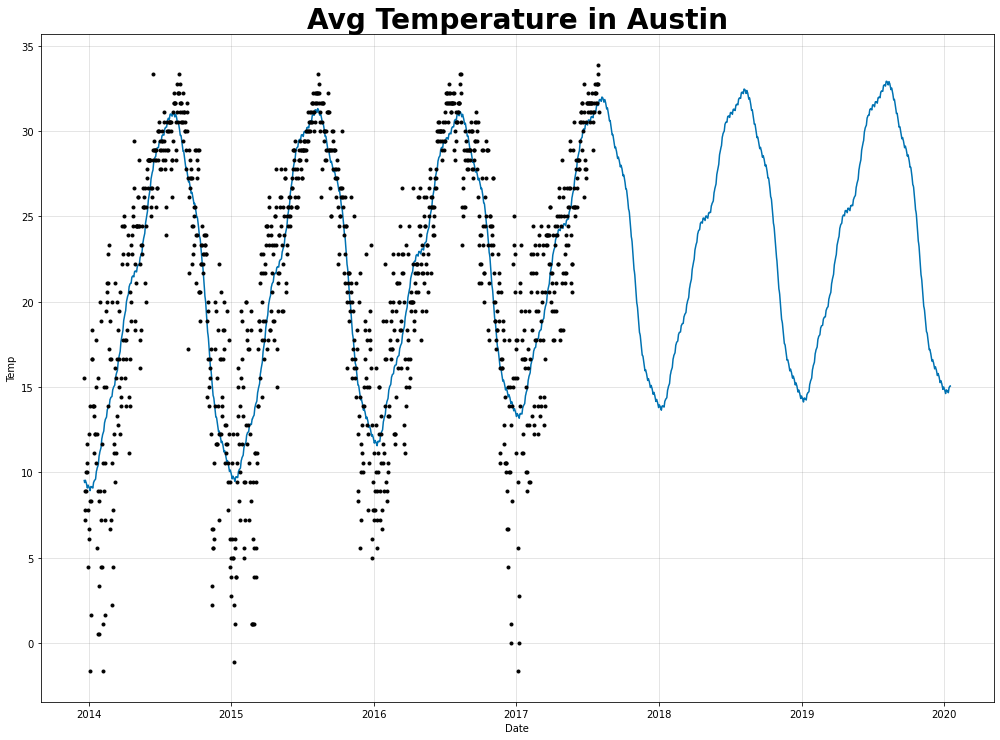

In [15]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast,xlabel="Date", ylabel="Temp", ax=ax)
ax.set_title("Avg Temperature in Austin", fontsize=28, fontweight="bold")
plt.show()


# 4. Save model

In [16]:
import pickle

with open('forecast_model.pkl', 'wb') as f:
    pickle.dump(model, f)